In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import h5py 

import sys
sys.path.append('../../')

from evaluation import *

np.random.seed(5)

/home/aryzhikov/.conda/envs/lasagne2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from sklearn.mixture import GaussianMixture
# pip install ard-em
from ard_em import GaussianMixtureARD

In [4]:
import scipy.io
mat = scipy.io.loadmat('../../datasets/thyroid.mat')

X_data = mat["X"]
X_data = StandardScaler().fit_transform(X_data)

labels = mat["y"]

In [5]:
from sklearn.model_selection import train_test_split
indx_train, indx_test = train_test_split(np.arange(len(labels), dtype='int32'), stratify=labels, test_size=0.5, random_state = 5)

In [6]:
y_train = labels[indx_train]
y_test = labels[indx_test]

X_train = X_data[indx_train]
X_test = X_data[indx_test]

In [6]:
X_good = X_train[np.where(y_train==0)[0]]

In [7]:
size = X_good.shape
noise = np.random.normal(0, 1e-4, size)*np.random.binomial(1, 0.2, size)

In [8]:
X_good.shape, X_train.shape, X_data.shape

((1840, 6), (1886, 6), (3772, 6))

In [9]:
noise

array([[ 0.00000000e+00, -3.30870152e-05,  2.43077119e-04,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  1.87603226e-05,
        -0.00000000e+00, -0.00000000e+00, -2.04876511e-05],
       [-3.58828947e-05,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -2.37727183e-05,  0.00000000e+00]])

In [13]:
# gm = GaussianMixture(n_components=7, n_init=6, verbose=2)
gm = GaussianMixtureARD(n_init=6, verbose=2)

In [14]:
gm.fit(X_good+noise)

Initialization 0
Initialization 0
  Iteration 0	 time lapse 0.09252s	 ll change inf
  Iteration 10	 time lapse 0.17556s	 ll change 0.02983
  Iteration 20	 time lapse 0.17264s	 ll change 0.04098
  Iteration 30	 time lapse 0.17531s	 ll change 0.00119
Initialization converged: True	 time lapse 0.92522s	 ll 0.57570
Initialization 1
  Iteration 0	 time lapse 0.07102s	 ll change inf
  Iteration 10	 time lapse 0.17806s	 ll change 0.10952
  Iteration 20	 time lapse 0.18987s	 ll change 0.00306
  Iteration 30	 time lapse 0.17547s	 ll change 0.00260
  Iteration 40	 time lapse 0.17889s	 ll change 0.04151
  Iteration 50	 time lapse 0.18214s	 ll change 0.00309
Initialization converged: True	 time lapse 1.07872s	 ll 0.84052
Initialization 2
  Iteration 0	 time lapse 0.07608s	 ll change inf
  Iteration 10	 time lapse 0.17803s	 ll change 0.02950
  Iteration 20	 time lapse 0.17342s	 ll change 0.01313
  Iteration 30	 time lapse 0.17374s	 ll change 0.00331
  Iteration 40	 time lapse 0.17217s	 ll change 0.

  Iteration 50	 time lapse 0.17432s	 ll change 0.00343
Initialization converged: True	 time lapse 1.07741s	 ll 0.66255
Initialization 2
  Iteration 0	 time lapse 0.09736s	 ll change inf
  Iteration 10	 time lapse 0.25383s	 ll change 0.23835
  Iteration 20	 time lapse 0.21408s	 ll change 0.00835
  Iteration 30	 time lapse 0.17085s	 ll change 0.00112
Initialization converged: True	 time lapse 0.75325s	 ll 0.40525
Initialization 3
  Iteration 0	 time lapse 0.08716s	 ll change inf
  Iteration 10	 time lapse 0.17235s	 ll change 0.10436
  Iteration 20	 time lapse 0.18296s	 ll change 0.00356
Initialization converged: True	 time lapse 0.58078s	 ll 0.36648
Initialization 4
  Iteration 0	 time lapse 0.06909s	 ll change inf
  Iteration 10	 time lapse 0.17497s	 ll change 0.23229
  Iteration 20	 time lapse 0.17663s	 ll change 0.00837
  Iteration 30	 time lapse 0.17296s	 ll change 0.00778
  Iteration 40	 time lapse 0.17496s	 ll change 0.00545
  Iteration 50	 time lapse 0.17103s	 ll change 0.00528
  

ArdGaussianMixture(alpha_bound=1000.0, covariance_type='full',
          init_components='sqrt', init_params='kmeans', max_iter=100,
          means_init=None, n_init=6, precisions_init=None,
          random_state=None, reg_covar=1e-06, tol=0.001, verbose=2,
          verbose_interval=10, warm_start=False, weight_bound=0.001,
          weights_init=None)

In [15]:
from scipy.stats import multivariate_normal

In [16]:
n_samples = X_good.shape[0]

In [17]:
gen = np.array(multivariate_normal.rvs(mean=gm.means_[0], cov=gm.covariances_[0], size=int(gm.weights_[0]*n_samples)))
for d in range(1,gm.n_components):
    gen=np.vstack((gen,multivariate_normal.rvs(mean=gm.means_[d], cov=gm.covariances_[d], size=int(gm.weights_[d]*n_samples))))
np.random.shuffle(gen)
gen = np.array(gen)

In [18]:
probabilities = np.empty((gm.n_components, gen.shape[0]))

In [19]:
for d in range(gm.n_components):
    probabilities[d] = multivariate_normal.pdf(gen, mean=gm.means_[d], 
                                                    cov=gm.covariances_[d], allow_singular=True)

In [20]:
gen.shape

(1833, 6)

In [21]:
maxprob = np.max(probabilities, axis = 0)
gen_w = 1./(maxprob+1e-2)

In [22]:
#indices = gen_w.argsort()[-50:][::-1] #_toobig
#indices_toosmall = gen_w.argsort()[:200][::-1]

#indices = np.concatenate((indices_toosmall,indices_toobig))

In [23]:
#gen_w = np.delete(gen_w, indices)
#gen = np.delete(gen, indices, axis = 0)

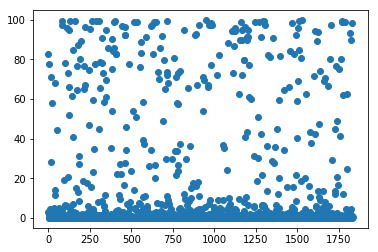

In [24]:
plt.scatter(np.arange(len(gen_w)), gen_w)
plt.show()

In [25]:
weights = np.ones((n_samples,1)) #X_train.shape[0]

In [26]:
gen_w_normed = gen_w/np.sum(gen_w)*np.sum(weights)

In [27]:
gen_w_normed.sum(), np.sum(weights)

(1839.9999999999995, 1840.0)

In [28]:
y1 = np.zeros((n_samples,1))
y2 = np.ones((gen.shape[0],1))

In [29]:
X_mix = np.vstack((X_good, gen)) #X_good

y_mix = np.vstack((y1, y2)) #y_train

weights_mix = np.vstack((weights.reshape(-1,1), gen_w_normed.reshape(-1,1))).reshape(-1)

In [30]:
weights_mix.shape

(3673,)

In [31]:
import tensorflow as tf

s = tf.InteractiveSession()

import keras
from keras.models import Sequential
from keras import layers as L

Using TensorFlow backend.


In [32]:
net = Sequential()
net.add(L.Dense(64, input_shape=(6,), activation = 'relu'))
#net.add(L.BatchNormalization())
#net.add(L.Dense(32, activation='relu'))
net.add(L.BatchNormalization())
net.add(L.Dropout(0.2))
net.add(L.Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(lr=0.001)
net.compile(optimizer=adam, loss='binary_crossentropy')

In [33]:
history = net.fit(X_mix, y_mix, batch_size=256, epochs=120, validation_split = 0.1, verbose=1, shuffle=True, sample_weight=weights_mix)

Train on 3305 samples, validate on 368 samples
Epoch 1/120
3305/3305 [==============================] - 0s 54us/step - loss: 1.1634 - val_loss: 0.8010
Epoch 2/120
3305/3305 [==============================] - 0s 13us/step - loss: 0.8356 - val_loss: 0.6032
Epoch 3/120
3305/3305 [==============================] - 0s 14us/step - loss: 0.6662 - val_loss: 0.5702
Epoch 4/120
3305/3305 [==============================] - 0s 14us/step - loss: 0.6129 - val_loss: 0.5602
Epoch 5/120
3305/3305 [==============================] - 0s 12us/step - loss: 0.6154 - val_loss: 0.5558
Epoch 6/120
3305/3305 [==============================] - 0s 13us/step - loss: 0.5558 - val_loss: 0.5489
Epoch 7/120
3305/3305 [==============================] - 0s 12us/step - loss: 0.5224 - val_loss: 0.5544
Epoch 8/120
3305/3305 [==============================] - 0s 13us/step - loss: 0.5442 - val_loss: 0.5702
Epoch 9/120
3305/3305 [==============================] - 0s 13us/step - loss: 0.5350 - val_loss: 0.5683
Epoch 10/120
3305

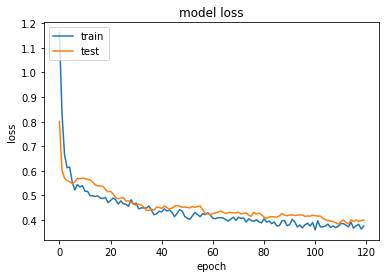

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
y_pred = net.predict(X_test, verbose=1)

1886/1886 [==============================] - 0s 28us/step


('f1_score ', 0.323943661971831)
confusion_matrix 
[[1648  191]
 [   1   46]]


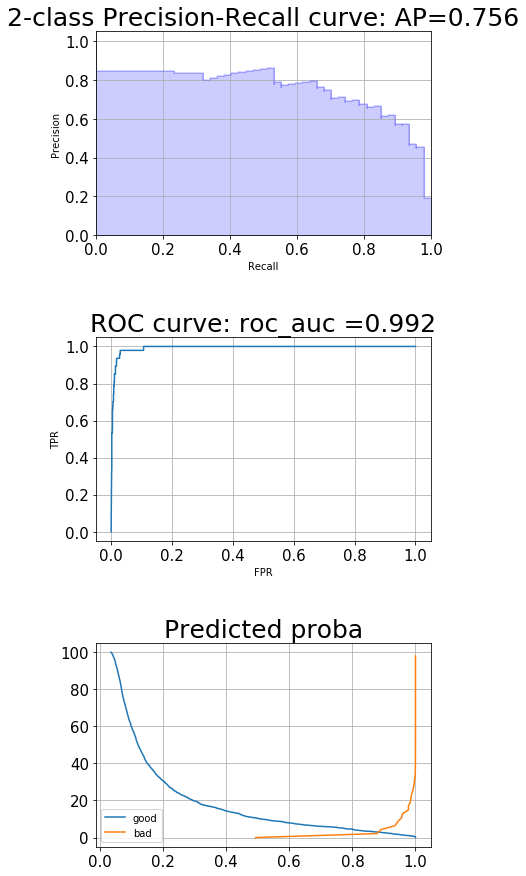

In [36]:
perfomance(y_test, y_pred)